# Explotatory Data Analysis (EDA)

## Contents 

1. About the dataset<br>
&nbsp;&nbsp;1.1 Dataset Loading<br>
&nbsp;&nbsp;1.2 Tabular Information<br>
2. Objective of our EDA<br>
3. Univariate EDA<br>
&nbsp;&nbsp;3.1 Bar chart<br>
&nbsp;&nbsp;3.2 Histogram<br>
&nbsp;&nbsp;&nbsp;&nbsp;3.2.1 Age attribute<br>
&nbsp;&nbsp;&nbsp;&nbsp;3.2.2 Year attribute<br>
&nbsp;&nbsp;&nbsp;&nbsp;3.2.3 Positive Nodes attribute<br>
4. Bivariate EDA<br>
&nbsp;&nbsp;4.1 Scatter plot<br>
&nbsp;&nbsp;4.2 Pair plot<br>
&nbsp;&nbsp;4.3 Correlation Heatmap<br>
5. Multivariate EDA<br>
&nbsp;&nbsp;5.1 3-D plot<br>
6. Conclusion 

## 1. About the dataset 

1. Title: Haberman's Survival Data. Link: https://www.kaggle.com/gilsousa/habermans-survival-data-set 
2. Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999
3. Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
4. Attribute Information:
    * Age of patient at time of operation (numerical)
    * Patient's year of operation (year - 1900, numerical)
    * Number of positive axillary nodes detected (numerical)
    * Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

### 1.1. Dataset Loading 

In [1]:
# Importing required Libraries 
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib 
from matplotlib import pyplot as plt 
from scipy import stats
import pylab
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

#Loading the haberman.csv file and printing some of the rows.
HabermanDataFrame = pd.read_csv('haberman.csv')
HabermanDataFrame.head(5)

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


### 1.2. Other Informations About The Dataset

In [2]:
# Overall information about the DataFrame
HabermanDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
30     305 non-null int64
64     305 non-null int64
1      305 non-null int64
1.1    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [3]:
# Finding out the column names 
HabermanDataFrame.columns 

Index(['30', '64', '1', '1.1'], dtype='object')

In [4]:
# Renaming the columns according to their meanings
HabermanDataFrame = HabermanDataFrame.rename(columns={"30":"Age", "64":"Year", "1":"Positive Nodes", "1.1":"Survival Status"})
HabermanDataFrame.columns

Index(['Age', 'Year', 'Positive Nodes', 'Survival Status'], dtype='object')

In [5]:
# Checking for null values
HabermanDataFrame.isnull().any()

Age                False
Year               False
Positive Nodes     False
Survival Status    False
dtype: bool

In [6]:
# Shape of our dataset 
HabermanDataFrame.shape

(305, 4)

In [7]:
# How many patients from each class 
HabermanDataFrame["Survival Status"].value_counts()

1    224
2     81
Name: Survival Status, dtype: int64

Observations:
* Haberman's dataset has 305 entries and it ranges from index 0 to 304.
* It has 4 columns and each column's data type is int64.
* No attritubes(columns) contain null value.
* Shape of our DataFrame is (305, 4) i.e we have 305 rows and 4 columns.
* Among 305 patients, 224 patients survived more than 5 years and other 81 patients died within 5 years. 

## 2. Objective of our EDA
Our objective here is to explore the Haberman's cancer survival dataset using visualization and apply some stastical analysis to gain some intuition about relationship between the attributes and the classes, So that we can come up with a set of attributes or some logics which will help us distinguish two classes. 

## 3. Univariate EDA
In univariate data analysis we explore characteristics of the population distribution of a quantitative variable. Such as its center, spread, modality (number of peaks in the pdf), shape (including “heaviness of the tails”) and outliers etc.

### 3.1 Bar Chart 

Text(0.5,1,'Bar Chart On Survial Status')

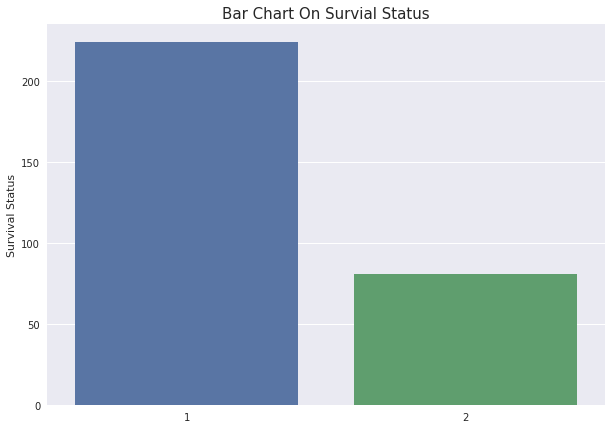

In [8]:
#Simple bar chart to visualize overall data points in each class
sns.set(style="darkgrid")
plt.figure(figsize=(10,7))
ax = sns.barplot(x=HabermanDataFrame["Survival Status"].unique(), y=HabermanDataFrame["Survival Status"].value_counts(), data=HabermanDataFrame)
plt.title('Bar Chart On Survial Status', fontsize=15)

### 3.2 Histogram

#### 3.2.1 Age Attribute

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: Age, dtype: float64

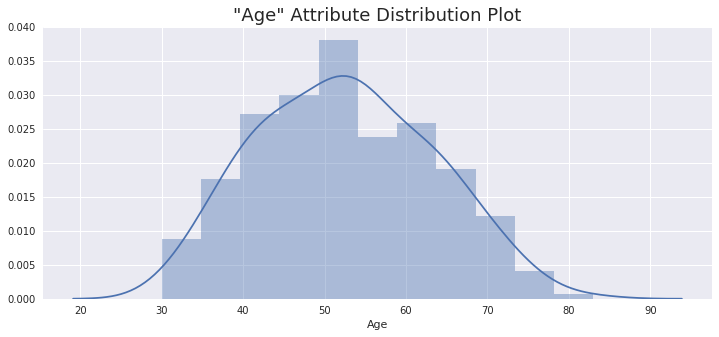

In [9]:
#Distribution plot along with histogram for Age attribute
plt.figure(figsize=(12,5))
sns.distplot(HabermanDataFrame["Age"])
plt.title('"Age" Attribute Distribution Plot', fontsize=18)
HabermanDataFrame["Age"].describe()

In [10]:
#Basic descriptive Statistics of Age attribute
iqr_age = HabermanDataFrame["Age"].describe()['75%'] - HabermanDataFrame["Age"].describe()['25%']
median_age = HabermanDataFrame["Age"].median()
mode_age = HabermanDataFrame["Age"].mode()
print("Inter Quartile Range for Age attribute is:", iqr_age)
print("Median of Age attribute is:", median_age)
print("Mode of Age attribute is:", mode_age)

Inter Quartile Range for Age attribute is: 17.0
Median of Age attribute is: 52.0
Mode of Age attribute is: 0    52
dtype: int64


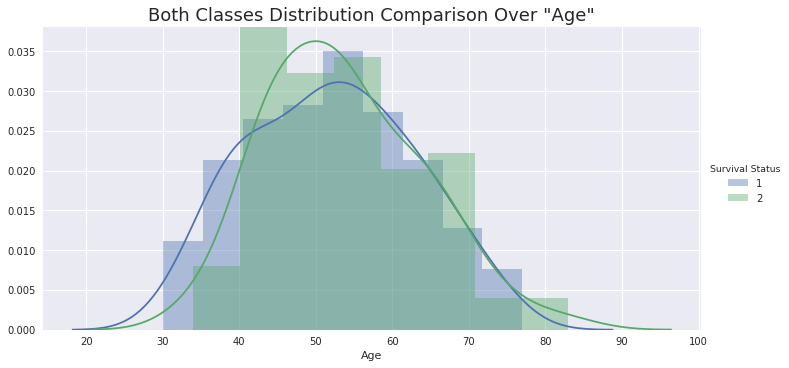

In [11]:
#Both classes distribution comparision over Age attribute
sns.FacetGrid(HabermanDataFrame, hue="Survival Status", aspect=2, size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.title('Both Classes Distribution Comparison Over "Age"', fontsize=18)
plt.show();

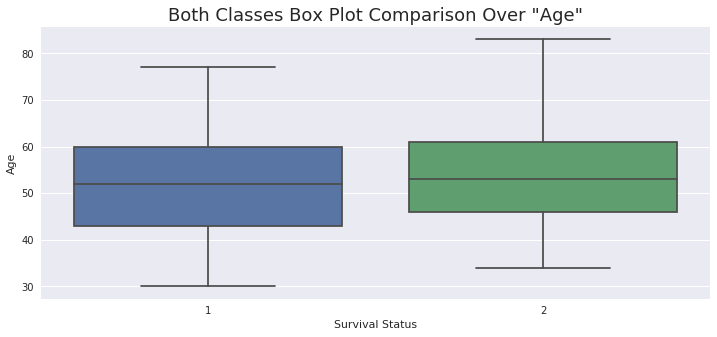

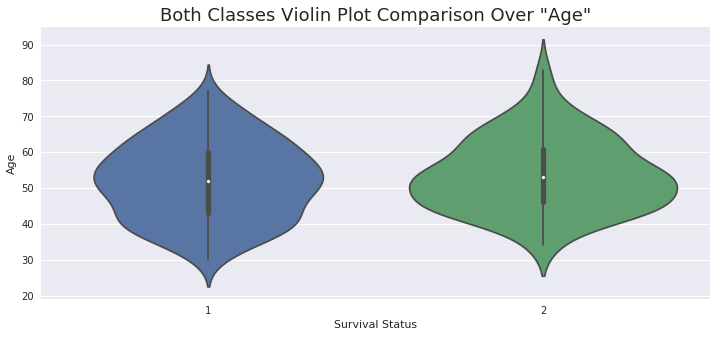

In [12]:
#Both classes box and violin plot comparision over Age attribute
plt.figure(1)
plt.figure(figsize=(12,5))
sns.boxplot(x=HabermanDataFrame['Survival Status'],y=HabermanDataFrame['Age'], data=HabermanDataFrame)
plt.title('Both Classes Box Plot Comparison Over "Age"', fontsize=18)
plt.figure(2)
plt.figure(figsize=(12,5))
sns.violinplot(x=HabermanDataFrame['Survival Status'],y=HabermanDataFrame['Age'], data=HabermanDataFrame)
plt.title('Both Classes Violin Plot Comparison Over "Age"', fontsize=18)
plt.show()

#### Observations on Age Attribute :
* From the plot it is totally clear that the Age attribute is normally distributed.
* Without even ploting the distribution we can easily say that the distribution is normal as mean, median and mode are same. 
* But both classes distributions comparison over Age attribute seems both classes are mixed up. They have nearly the same mean, median and variance etc which is not helpful to distinguish the classes.

#### 3.2.2 Year Attribute

count    305.000000
mean      62.849180
std        3.254078
min       58.000000
25%       60.000000
50%       63.000000
75%       66.000000
max       69.000000
Name: Year, dtype: float64

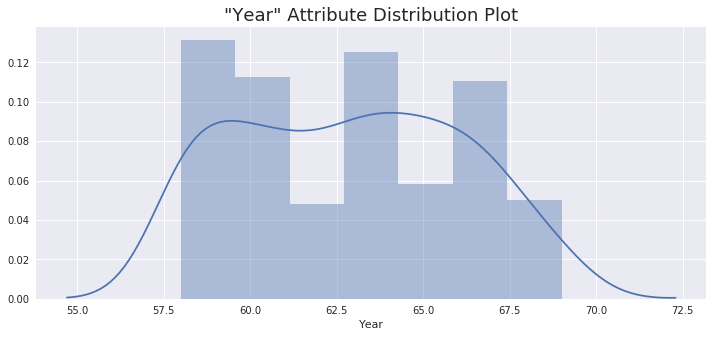

In [13]:
#Distribution plot along with histogram for Year attribute
plt.figure(figsize=(12,5))
sns.distplot(HabermanDataFrame["Year"])
plt.title('"Year" Attribute Distribution Plot', fontsize=18)
HabermanDataFrame["Year"].describe()

In [14]:
#Basic descriptive Statistics of Year attribute
iqr_year = HabermanDataFrame["Year"].describe()['75%'] - HabermanDataFrame["Year"].describe()['25%']
median_year = HabermanDataFrame["Year"].median()
mode_year = HabermanDataFrame["Year"].mode()
print("Inter Quartile Range for Age attribute is:", iqr_age)
print("Median of Age attribute is:", median_year)
print("Mode of Age attribute is:", mode_year)

Inter Quartile Range for Age attribute is: 17.0
Median of Age attribute is: 63.0
Mode of Age attribute is: 0    58
dtype: int64


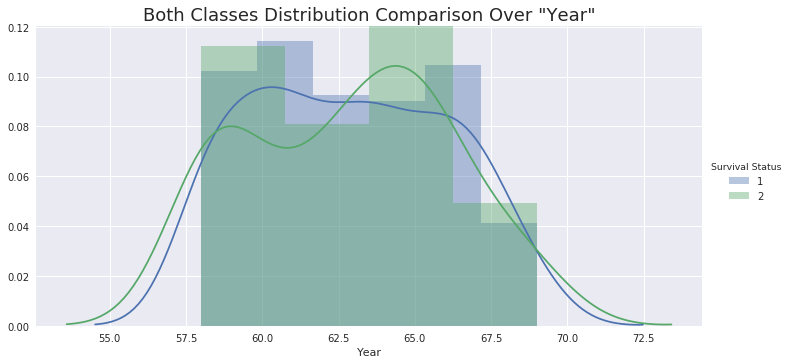

In [15]:
#Both classes distribution comparision over Year attribute
sns.FacetGrid(HabermanDataFrame, hue="Survival Status", size=5, aspect=2) \
   .map(sns.distplot, "Year") \
   .add_legend();
plt.title('Both Classes Distribution Comparison Over "Year"', fontsize=18)
plt.show();

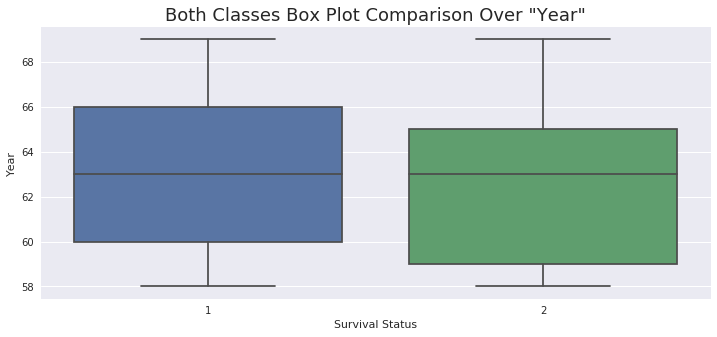

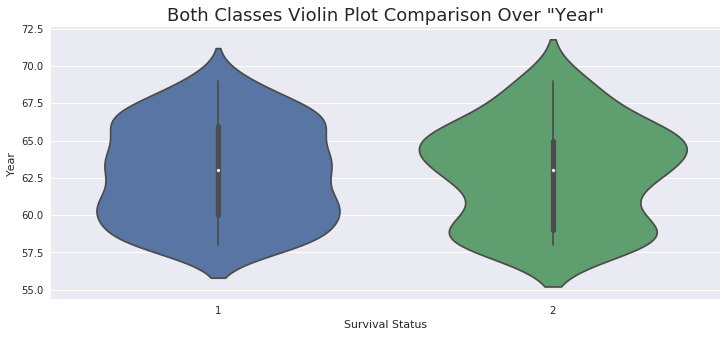

In [16]:
#Both classes box and violin plot comparision over Year attribute
plt.figure(1)
plt.figure(figsize=(12, 5))
sns.boxplot(x=HabermanDataFrame['Survival Status'],y=HabermanDataFrame['Year'], data=HabermanDataFrame)
plt.title('Both Classes Box Plot Comparison Over "Year"', fontsize=18)
plt.figure(2)
plt.figure(figsize=(12, 5))
sns.violinplot(x=HabermanDataFrame['Survival Status'],y=HabermanDataFrame['Year'], data=HabermanDataFrame)
plt.title('Both Classes Violin Plot Comparison Over "Year"', fontsize=18)
plt.show()

#### Observations on Year Attribute :-
* Year attribute is not normally distributed. From visualization it is somewhat bimodal distribution because it has 2 peaks.
* The both classes distributions over Year attribute have nearly same mean and they overlap with each other completely. 
* The survived class distribution seems like multi-modal distribution where as died class distribution seems like a bimoal distribution.
* From the died class distribution, the age group around 58 and 63 seems to die in large numbers then the survived ones. But it is not completely distinguishable due to fair amount of overlapping.

#### 3.2.3 Positive Nodes Attribute 

count    305.000000
mean       4.036066
std        7.199370
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: Positive Nodes, dtype: float64

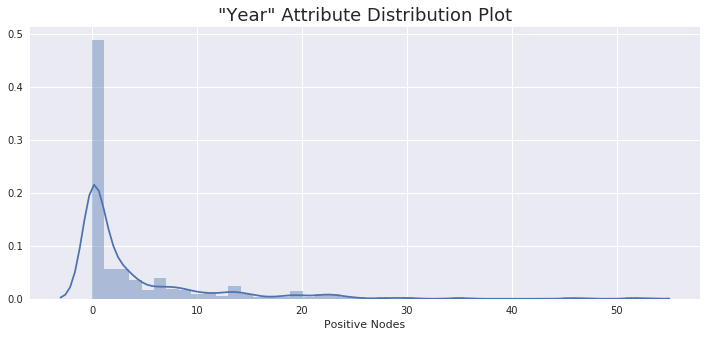

In [17]:
#Distribution plot along with histogram for Positive Nodes attribute 
plt.figure(figsize=(12,5))
sns.distplot(HabermanDataFrame["Positive Nodes"])
plt.title('"Year" Attribute Distribution Plot', fontsize=18)
HabermanDataFrame["Positive Nodes"].describe()

In [18]:
#Basic descriptive Statistics of Positive Nodes attribute
iqr_positive_node = HabermanDataFrame["Positive Nodes"].describe()['75%'] - HabermanDataFrame["Positive Nodes"].describe()['25%']
median_positive_node = HabermanDataFrame["Positive Nodes"].median()
mode_positive_node = HabermanDataFrame["Positive Nodes"].mode()
print("Inter Quartile Range for Age attribute is:", iqr_positive_node)
print("Median of Age attribute is:", median_positive_node)
print("Mode of Age attribute is:", mode_positive_node)

Inter Quartile Range for Age attribute is: 4.0
Median of Age attribute is: 1.0
Mode of Age attribute is: 0    0
dtype: int64


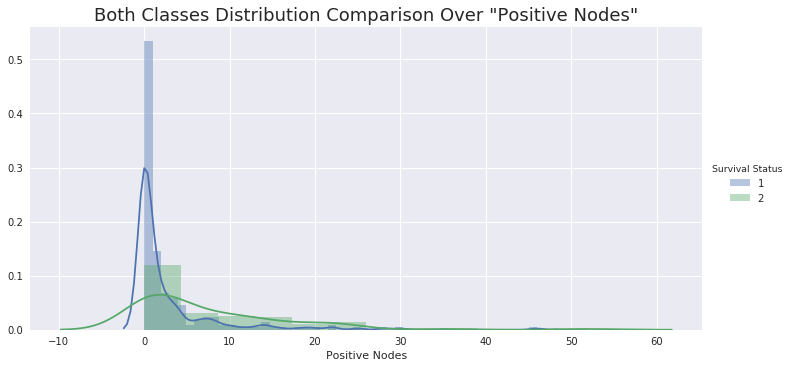

In [19]:
#Both classes distribution comparision over Positive Nodes attribute
sns.FacetGrid(HabermanDataFrame, hue="Survival Status", size=5, aspect=2) \
   .map(sns.distplot, "Positive Nodes") \
   .add_legend();
plt.title('Both Classes Distribution Comparison Over "Positive Nodes"', fontsize=18)
plt.show();

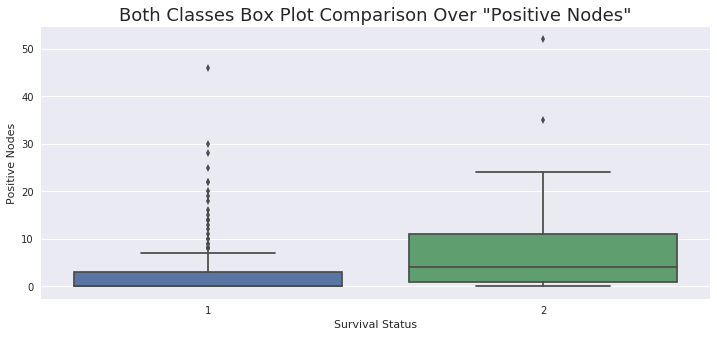

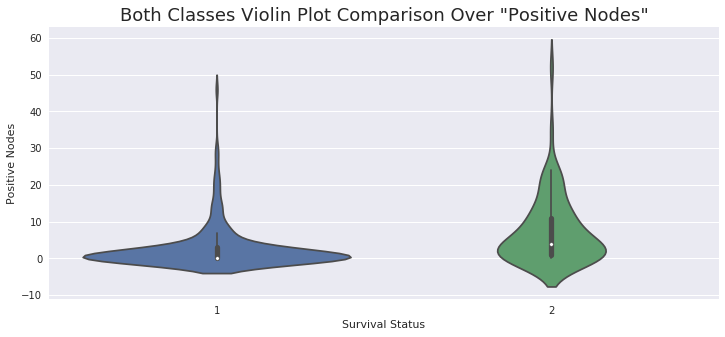

In [20]:
#Both classes box and violin plot comparision over Positive Nodes attribute
plt.figure(1)
plt.figure(figsize=(12, 5))
sns.boxplot(x=HabermanDataFrame['Survival Status'],y=HabermanDataFrame['Positive Nodes'], data=HabermanDataFrame)
plt.title('Both Classes Box Plot Comparison Over "Positive Nodes"', fontsize=18)
plt.figure(2)
plt.figure(figsize=(12, 5))
sns.violinplot(x=HabermanDataFrame['Survival Status'],y=HabermanDataFrame['Positive Nodes'], data=HabermanDataFrame)
plt.title('Both Classes Violin Plot Comparison Over "Positive Nodes"', fontsize=18)
plt.show()

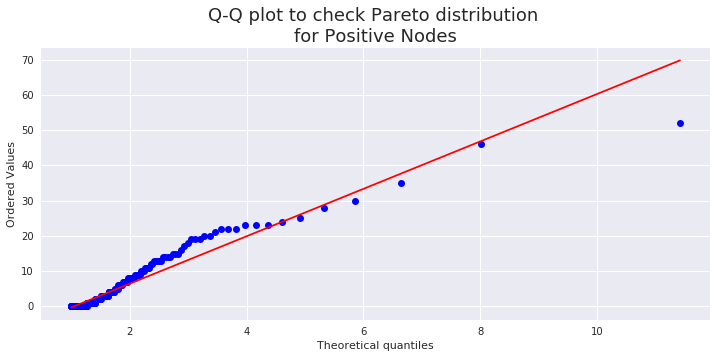

In [21]:
#Check for pareto distribution 
plt.figure(figsize=(12, 5))
stats.probplot(HabermanDataFrame["Positive Nodes"], dist=stats.pareto, sparams=(2.5,), plot=pylab)
plt.title('Q-Q plot to check Pareto distribution \nfor Positive Nodes', fontsize=18)
pylab.show()

#### Observations on Positive nodes Attribute :
* The distribution of positive nodes attribute is heavily right skewed.
* So box and whisker plot is plotted to find out possible outliers. And here we can see clearly that our positive nodes attribute contains a lot of outliers. 
* In this distribution there is no data point below 2nd quantile. It seems like a Pareto distribution. 
* But from Q-Q plot it is quite clear that it is not a pareto distribution.
* Even this attribute is seemingly overlapping but people having more than 5 positive auxilary nodes are died in much numbers than the survied ones. 

## 4. Bivariate EDA
Bivariate analysis is the analysis of exactly two variables. It gives us intuition about which two attributes combiningly helps us in classification better.

### 4.1 Scatter Plot


Text(0.5,1,'Scatterplot Between "Age" & "Positive Nodes"')

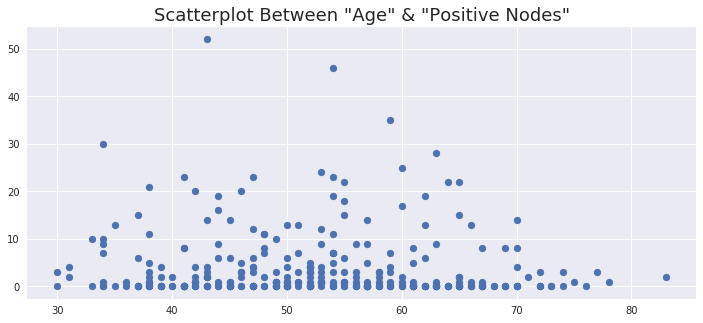

In [22]:
#Simple scatterplot demonstration 
plt.figure(figsize=(12,5))
plt.scatter(x=HabermanDataFrame['Age'], y=HabermanDataFrame['Positive Nodes'], data=HabermanDataFrame);
plt.title('Scatterplot Between "Age" & "Positive Nodes"', fontsize=18)

### 4.2 Pair Plot

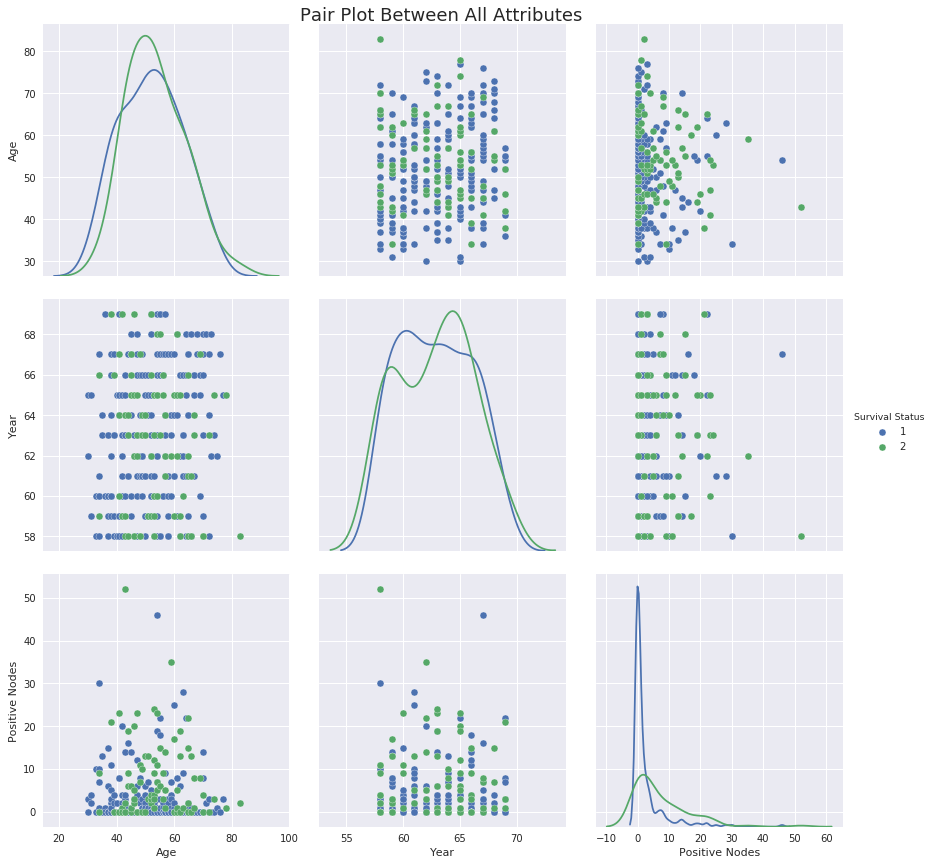

In [23]:
#Pairplot to visualize scatterplot between each pair of attributes
sns.pairplot(HabermanDataFrame, hue="Survival Status",vars=['Age', 'Year', 'Positive Nodes'], diag_kind = 'kde', size=4)
plt.suptitle('Pair Plot Between All Attributes',x=.48, y=1, fontsize=18)
plt.show()

#### Observations:
* It is really hard to tell anything about which two attributes are preferable for classification.
* Both classes i.e survied and died data points in every pair of scatter plots are so mixed that it is impossible to write any simple if-else logic to classify them.
* And even drawing any boundary line using ML models to classify the two classes may result low accuracy. 

### 4.3 Correlation Heatmat
Correlation matrix to gain further knowledge about the relationship in between each pair of attributes. 

Text(0.5,1,'Correlation Heatmap Between All Attributes')

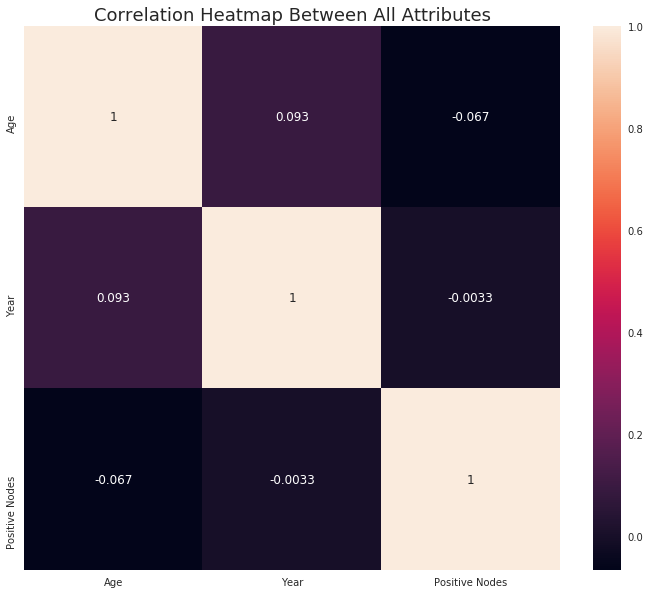

In [24]:
#Heatmap of correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(HabermanDataFrame.drop('Survival Status', axis =1).corr(), annot=True)
plt.title('Correlation Heatmap Between All Attributes', fontsize=18)

#### Observations:
* All the correlation values are too low i.e the attributes are poorly correlated to each other.

## 5. Multivariate EDA

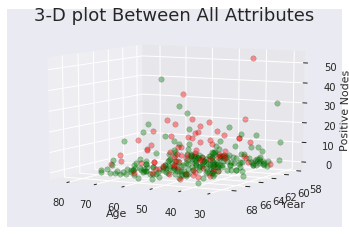

In [25]:
#3-D scatter plot between all 3 attributes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = list(HabermanDataFrame['Age'])
ys = list(HabermanDataFrame['Year'])
zs = list(HabermanDataFrame['Positive Nodes'])

#Green for survived ones and Red for died ones
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if i == 2 else 'green' for i in list(HabermanDataFrame['Survival Status'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('Age')
ax.set_ylabel('Year')
ax.set_zlabel('Positive Nodes')
plt.title('3-D plot Between All Attributes', fontsize=18)

ax.view_init(10, 118)

## 6. Conclusion:
* Both classes data points are jumbled up over all attributes. 
* From the 3-D plot it seems that people having 10 or more number of positive nodes have more chances to die within 5 years.
* On a final note this dataset is kind of a jumbled one so distinguishing the classes with more accuracy is hard from these set of attributes.